In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task- 1[EDA]

In [2]:
df=pd.read_csv('wine.csv')

In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape

(178, 14)

In [6]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


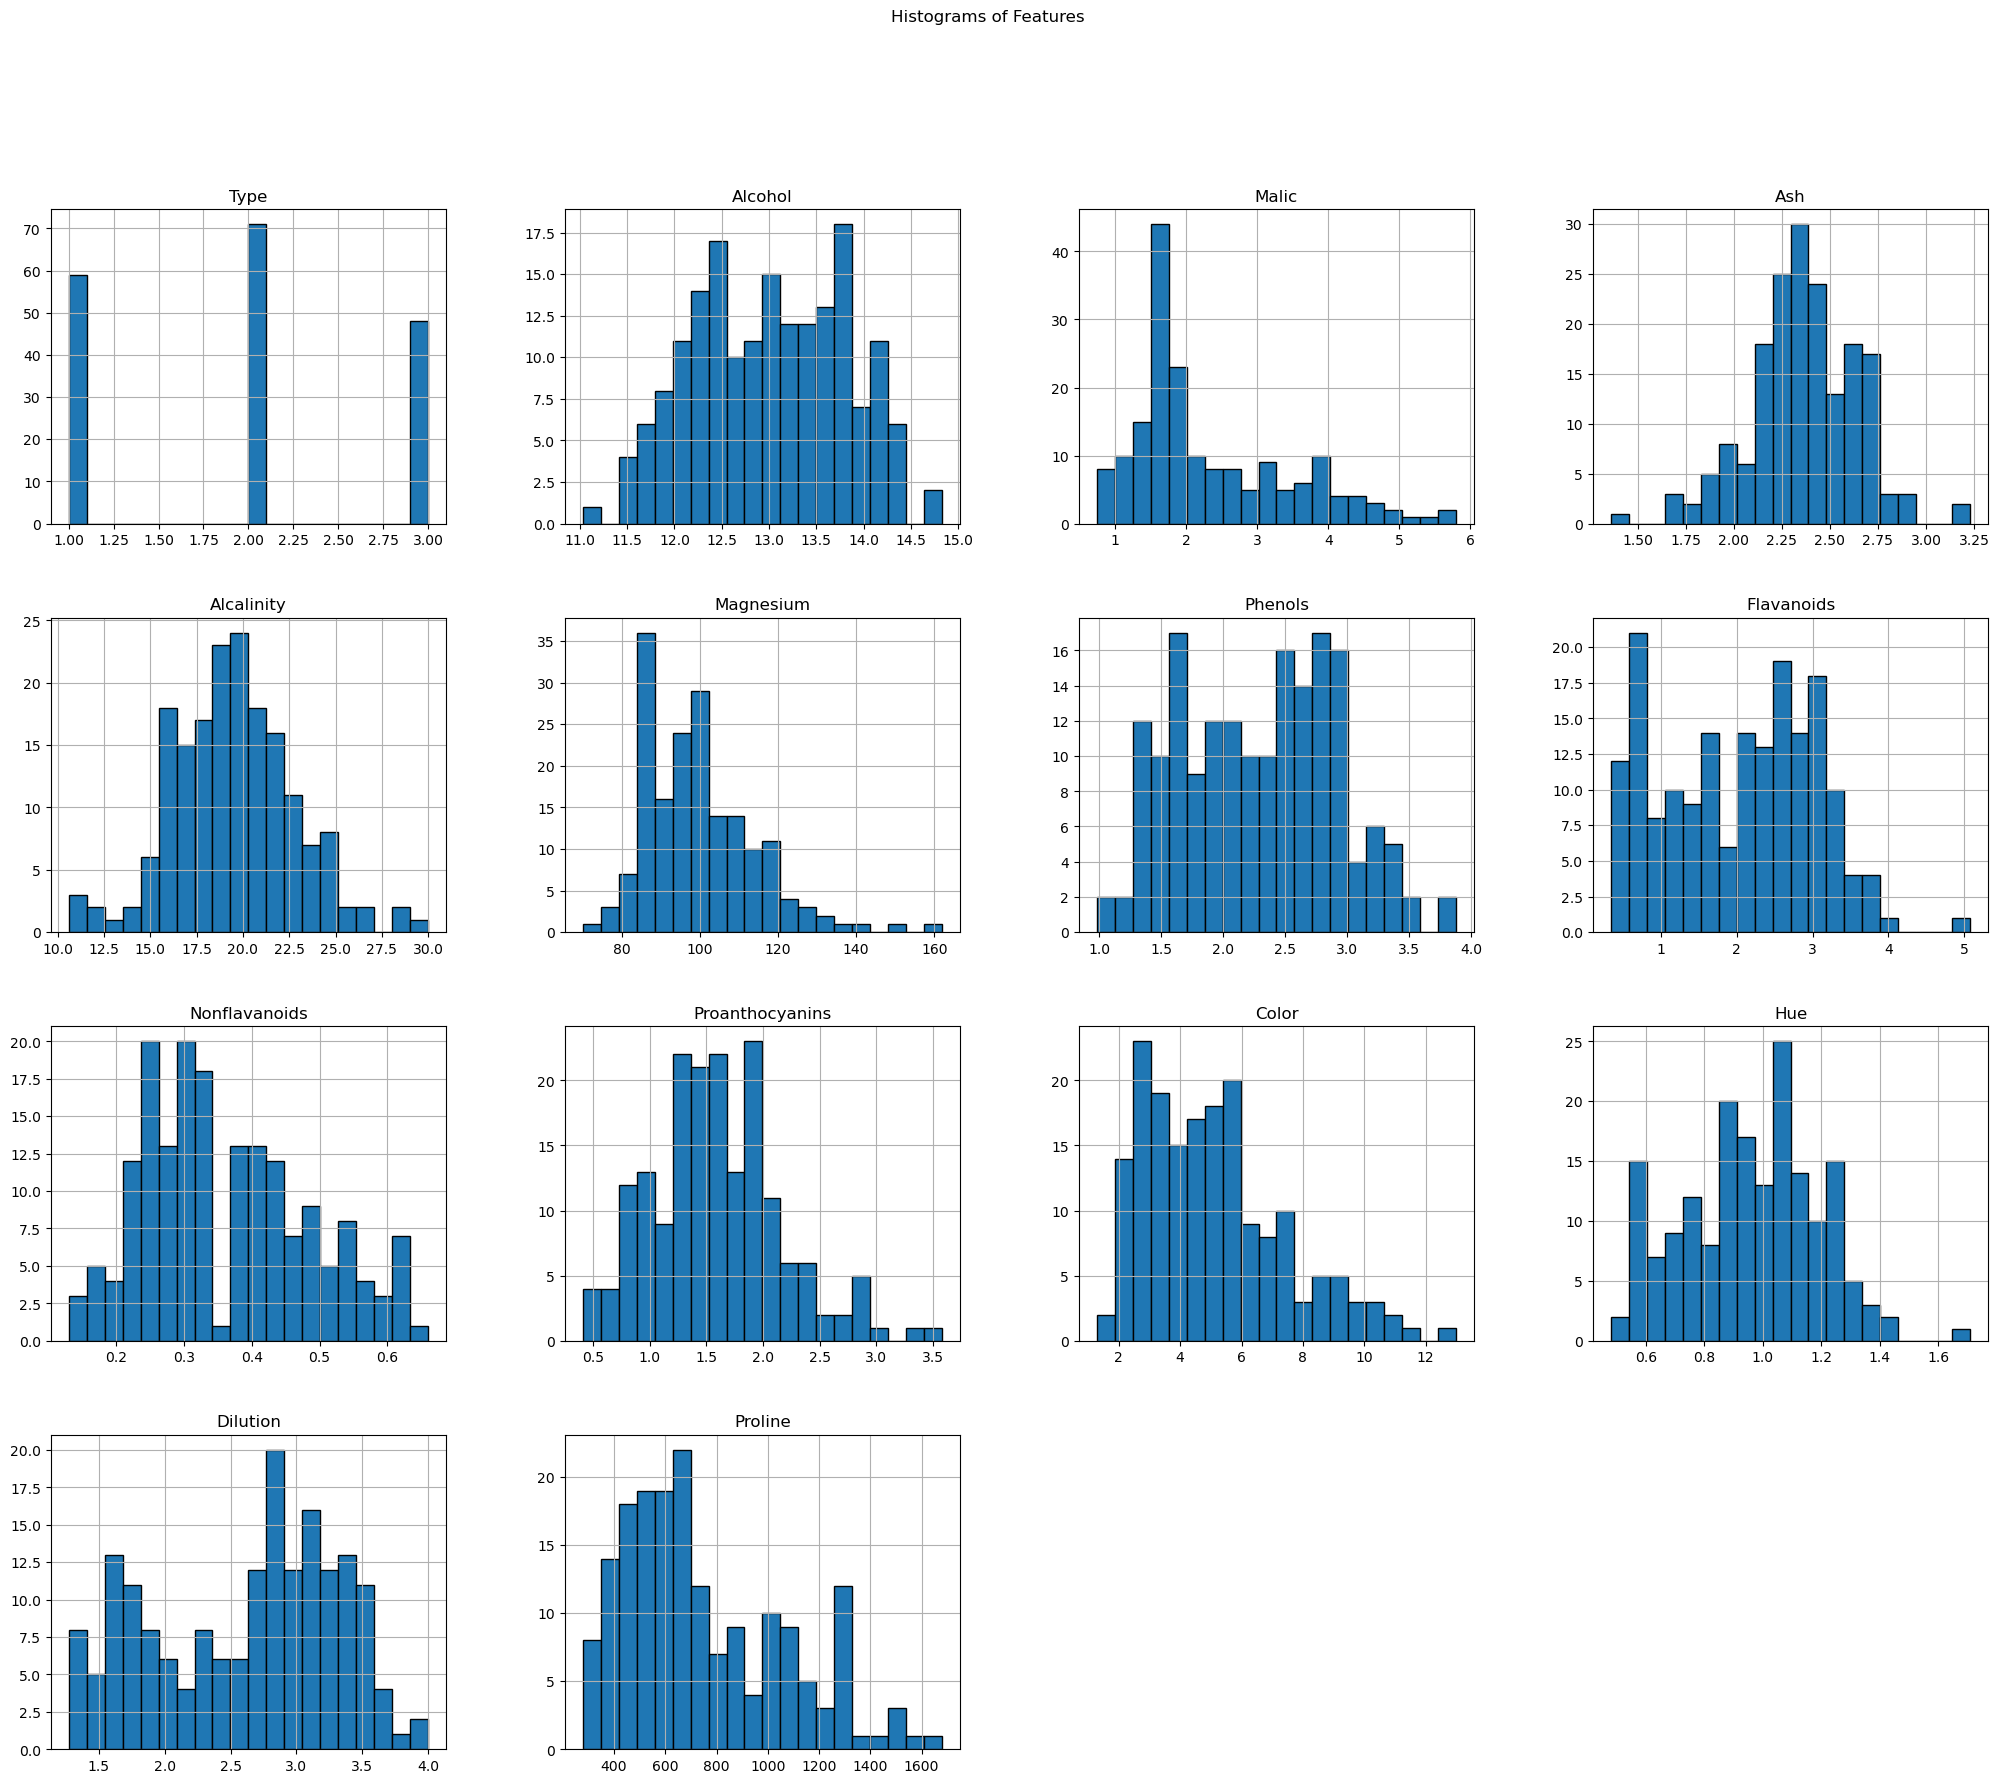

In [25]:
df.hist(figsize=(25, 20), bins=20,edgecolor="black")
plt.suptitle("Histograms of Features")
plt.show()

<Axes: >

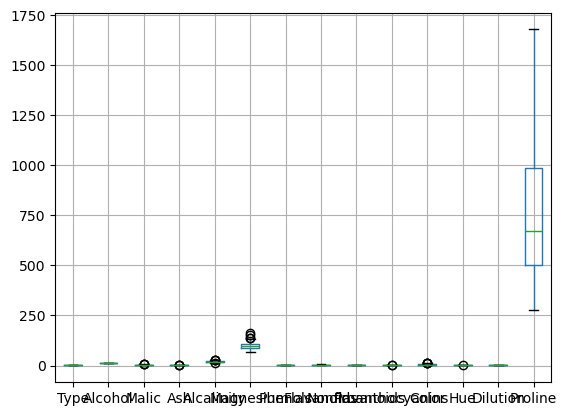

In [27]:
df.boxplot()

In [28]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    Lower_extreme=Q1-1.5*IQR
    Upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:Lower_extreme if x<Lower_extreme else Upper_extreme if x>Upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

<Axes: >

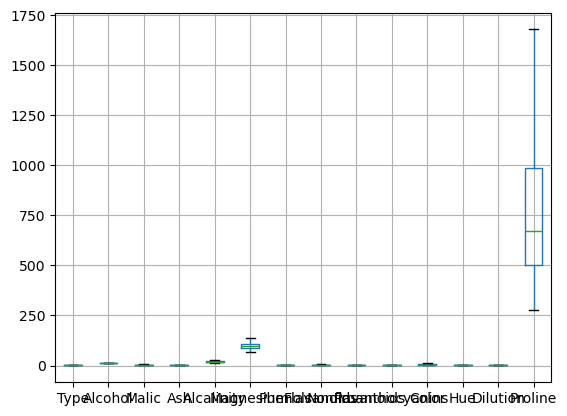

In [29]:
df.boxplot()

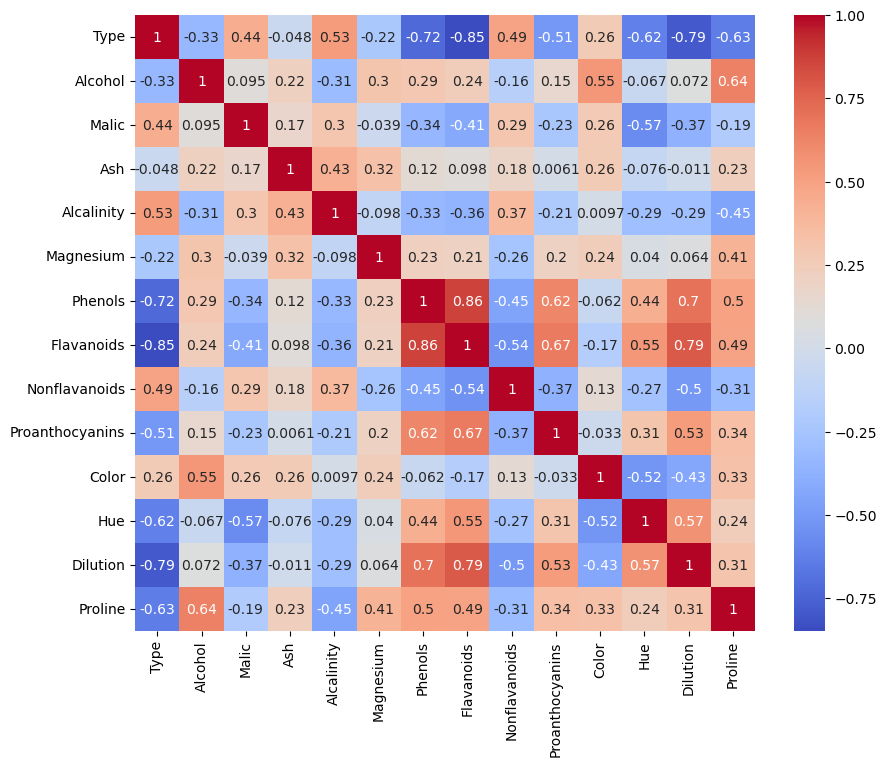

In [30]:
plt.figure(figsize=(10,8))
corr=df.corr()
sns.heatmap(corr,annot=True, cmap="coolwarm")
plt.show()

## Task-2

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [97]:
x=df.drop("Type", axis=1)

In [98]:
scaler = StandardScaler()
sd=pd.DataFrame(scaler.fit_transform(x))
sd

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [99]:
Pca=PCA()
Pca_tra=Pca.fit_transform(sd)

In [100]:
Pca_tra

array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00,  2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00,  2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00,  2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

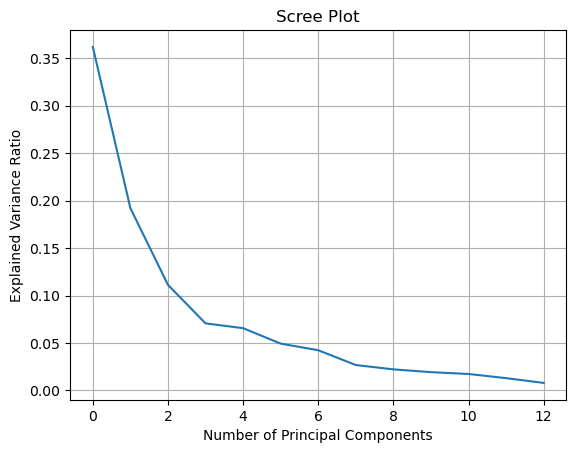

In [101]:
explained_variance = Pca.explained_variance_ratio_
plt.plot(explained_variance)
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

In [102]:
pca=PCA(n_components=2)
reduced_data=pca.fit_transform(sd)
print(reduced_data)

[[ 3.31675081  1.44346263]
 [ 2.20946492 -0.33339289]
 [ 2.51674015  1.0311513 ]
 [ 3.75706561  2.75637191]
 [ 1.00890849  0.86983082]
 [ 3.05025392  2.12240111]
 [ 2.44908967  1.17485013]
 [ 2.05943687  1.60896307]
 [ 2.5108743   0.91807096]
 [ 2.75362819  0.78943767]
 [ 3.47973668  1.30233324]
 [ 1.7547529   0.61197723]
 [ 2.11346234  0.67570634]
 [ 3.45815682  1.13062988]
 [ 4.31278391  2.09597558]
 [ 2.3051882   1.66255173]
 [ 2.17195527  2.32730534]
 [ 1.89897118  1.63136888]
 [ 3.54198508  2.51834367]
 [ 2.0845222   1.06113799]
 [ 3.12440254  0.78689711]
 [ 1.08657007  0.24174355]
 [ 2.53522408 -0.09184062]
 [ 1.64498834 -0.51627893]
 [ 1.76157587 -0.31714893]
 [ 0.9900791   0.94066734]
 [ 1.77527763  0.68617513]
 [ 1.23542396 -0.08980704]
 [ 2.18840633  0.68956962]
 [ 2.25610898  0.19146194]
 [ 2.50022003  1.24083383]
 [ 2.67741105  1.47187365]
 [ 1.62857912  0.05270445]
 [ 1.90269086  1.63306043]
 [ 1.41038853  0.69793432]
 [ 1.90382623  0.17671095]
 [ 1.38486223  0.65863985]
 

In [103]:
reduced_data.shape

(178, 2)

## Task-3

In [104]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [105]:
kmeans=KMeans(n_clusters=4)
clusters=kmeans.fit(df)
clusters

KMeans(n_clusters=4)

In [106]:
np.unique(clusters.labels_)

array([0, 1, 2, 3], dtype=int32)

In [107]:
silhouette_score(df,clusters.labels_)

np.float64(0.562013637082329)

In [117]:
df["clusters"]=clusters.labels_

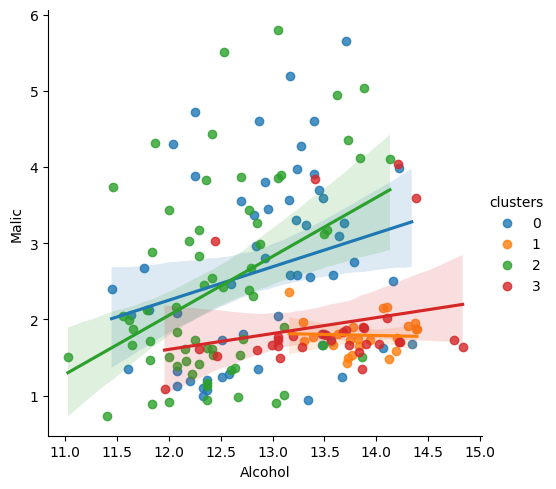

In [118]:
sns.lmplot(data=df,x="Alcohol",y="Malic",hue="clusters")
plt.show()

## Task-4

In [87]:
kmeans1=KMeans(n_clusters=4)
pca_clusters=kmeans1.fit(reduced_data)
pca_clusters

KMeans(n_clusters=4)

In [88]:
np.unique(pca_clusters.labels_)

array([0, 1, 2, 3], dtype=int32)

In [120]:
df["pca_clusters"]=pca_clusters.labels_

In [121]:
silhouette_score(reduced_data,pca_clusters.labels_)

np.float64(0.4882725115341298)

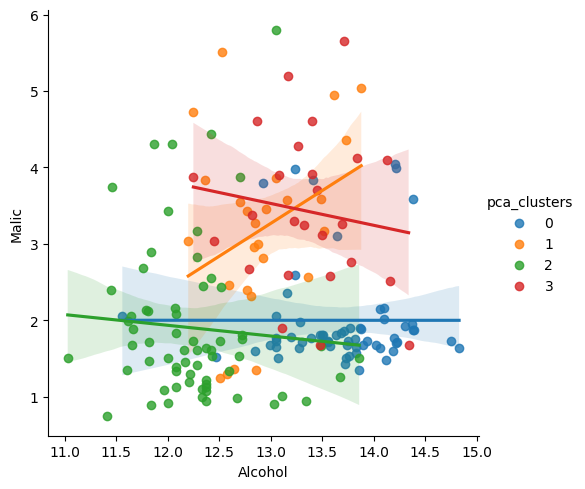

In [122]:
sns.lmplot(data=df,x="Alcohol",y="Malic",hue="pca_clusters")
plt.show()


## Task-6

## The dataset had different feature distributions, and some features were strongly related.

## *PCA reduced the data into 2 main parts (components) while keeping most of the information.

## *K-Means clustering worked on both original and PCA data.

## *PCA made the clusters easy to see in 2D, while original data gave slightly more detailed clusters.